In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
col_names = ['Gender', 'Age','Mstatus','Vaccine','Satisfied', 'Sum_Symptoms', 'Severity']
# load dataset
covid = pd.read_csv("/content/CovidData.csv", header=None, names=col_names)

In [ ]:
covid.head(10)

,Gender,Age,Mstatus,Vaccine,Satisfied,Sum_Symptoms,Severity
0,1,1,0,1,1,2,0
1,1,1,0,1,1,5,1
2,1,1,0,2,1,3,1
3,1,1,0,2,1,3,1
4,1,1,0,2,0,4,1
5,1,1,0,1,1,7,2
6,0,1,0,1,1,6,2
7,1,1,0,1,0,0,0
8,0,2,1,3,1,1,0
9,1,1,0,2,1,4,1


In [ ]:
#split dataset in features and target variable
feature_cols = ['Gender', 'Age','Mstatus','Vaccine','Satisfied', 'Sum_Symptoms']
x = covid[feature_cols] # Features
y = covid.Severity # Target variable

In [ ]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
y

0      0
1      1
2      1
3      1
4      1
      ..
895    0
896    0
897    0
898    0
899    2
Name: Severity, Length: 900, dtype: int64

In [ ]:
x

,Gender,Age,Mstatus,Vaccine,Satisfied,Sum_Symptoms
0,1,1,0,1,1,2
1,1,1,0,1,1,5
2,1,1,0,2,1,3
3,1,1,0,2,1,3
4,1,1,0,2,0,4
...,...,...,...,...,...,...
895,1,1,0,1,0,0
896,1,1,0,1,0,0
897,1,1,1,1,0,0
898,1,1,0,1,0,0


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
!pip install pydotplus
!apt install -y graphviz
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


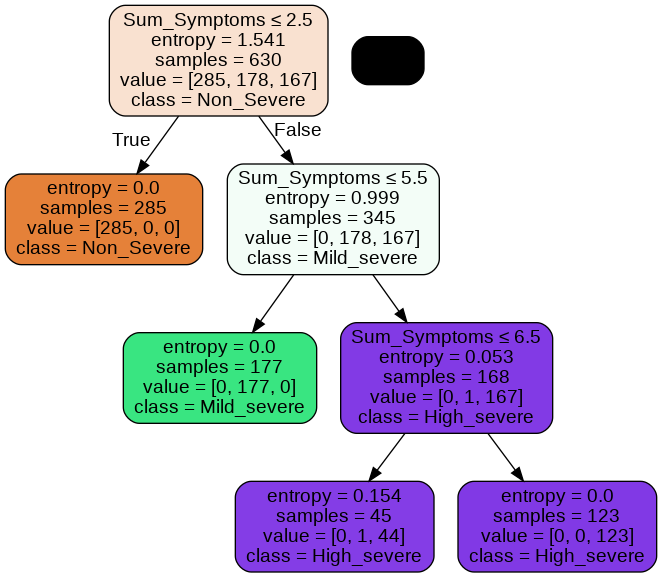

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Non_Severe','Mild_severe','High_severe'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Text(0, 0.5, 'Severity')

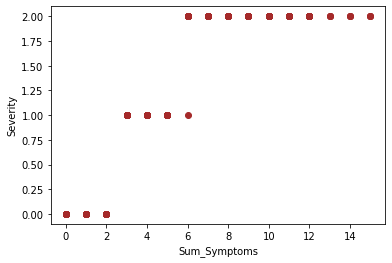

In [ ]:
plt.scatter(x=covid['Sum_Symptoms'],y=covid['Severity'],color='brown')
plt.xlabel('Sum_Symptoms')
plt.ylabel('Severity')